In [1]:
import pandas as pd
import numpy as np
import seaborn as sns # for data visualization
import matplotlib.pyplot as plt # for data visualization
%matplotlib inline

In [ ]:
#### Reeding Data

In [2]:
data = pd.read_csv("D:/Machine_Learning_Data/datasets_56485_108594_Breast_cancer_data.csv", delimiter =",")

In [4]:
#### Exploring the shape of the Data

In [3]:
data.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [7]:
data.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

In [8]:
count=data.diagnosis.value_counts()
count

1    357
0    212
Name: diagnosis, dtype: int64

Text(0, 0.5, 'count')

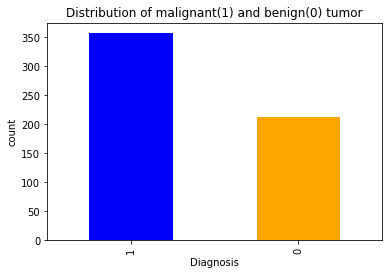

In [19]:
count.plot(kind='bar', color=["blue","orange"])
plt.title("Distribution of malignant(1) and benign(0) tumor")
plt.xlabel("Diagnosis")
plt.ylabel("count")

#####  Target Variable / Class

the main motive of our analysis is to correctly predict on the basis of the available data, if the breast cancer is:

. Malignant (1) harmful
. Benign (0) not harmful

In [26]:
y_target=data['diagnosis']

In [ ]:
#Now, among all of available features, we need to select the best set of features in order to train our predictor.
# A typical dataset may have features ranging from 30 to even about 100 and more. In such a case, feature selection play an 
# important role in the accuracy of the predictor.

In [28]:
data.columns.values

array(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'diagnosis'], dtype=object)

In [ ]:
# Let us now plot out a pairplot of the different features to determine which features are better at classifying the 2
# classes of our problem.

In [32]:
data['target'] = data['diagnosis'].map({0:'B', 1:'M'})
data.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis,target
0,17.99,10.38,122.80,1001.0,0.11840,0,B
1,20.57,17.77,132.90,1326.0,0.08474,0,B
2,19.69,21.25,130.00,1203.0,0.10960,0,B
3,11.42,20.38,77.58,386.1,0.14250,0,B
4,20.29,14.34,135.10,1297.0,0.10030,0,B


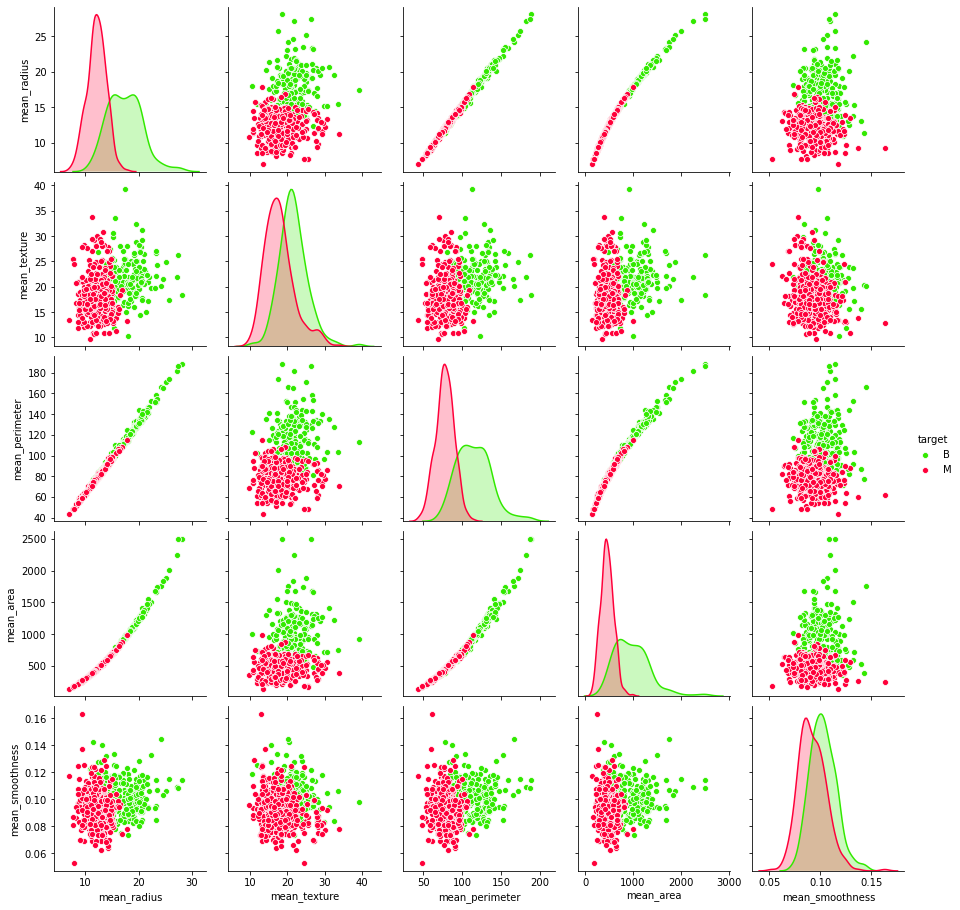

In [40]:
g = sns.pairplot(data.drop('diagnosis', axis=1), hue = 'target', palette='prism')

In [ ]:
### The Feature mean_perimetre and mean_texture seem to be most relevant

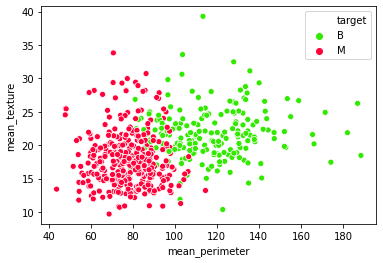

In [42]:
sns.scatterplot(x='mean_perimeter', y = 'mean_texture', hue='target', data = data, palette = 'prism')

In [50]:
features = [ 'mean_perimeter', 'mean_texture']
X_feature = data[features]
    

In [ ]:
# Splitting the data into training and test set
# We use crossvalidation to assess the predictive performance of the model and to judge how it performs outside 
# the sample to a new data set also known as test data.

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_feature, y_target, test_size = 0.3, random_state = 42)

In [56]:
### Binary classification Using Logistic Regression 
# This Algorithm is mostly used in such a problem where the target variable is binary (dichotomous) in nature

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [59]:
model = LogisticRegression()

In [60]:
# Train the Model 
model.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [63]:
!pip install mlxtend

In [65]:
##### Plotting the decision boundaries for 2 features 
from mlxtend.plotting import plot_decision_regions

C:\Users\omar\miniconda3\envs\tensorenv\lib\site-packages\mlxtend\plotting\decision_regions.py:249: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


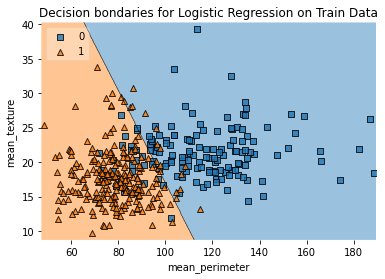

In [84]:
plot_decision_regions(X_train.values, Y_train.values,clf=model, legend = 2)
plt.title('Decision bondaries for Logistic Regression on Train Data')
plt.xlabel('mean_perimeter')
plt.ylabel('mean_texture');

In [ ]:
## It's Time to see the model's prediction (on the test set)

In [85]:
Y_pred = model.predict(X_test)

In [87]:
#### Accuracy
# we compare the predicted values (Y_pred) versus the actual values (Y_test)
acc = accuracy_score(Y_test, Y_pred)
print('Accuracy score using Logistic Regression is: ', acc*100)

Accuracy score using Logistic Regression is:  91.81286549707602


C:\Users\omar\miniconda3\envs\tensorenv\lib\site-packages\mlxtend\plotting\decision_regions.py:249: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


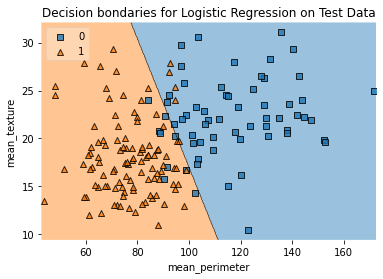

In [89]:
plot_decision_regions(X_test.values, Y_test.values, clf=model, legend=2)
plt.title('Decision bondaries for Logistic Regression on Test Data')
plt.xlabel('mean_perimeter')
plt.ylabel('mean_texture');

In [90]:
### Confusion Matrix
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(Y_test, Y_pred)
conf_mat

array([[ 54,   9],
       [  5, 103]], dtype=int64)

In [92]:
### Binary classification using K Nearest Neighbours 

from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
clf.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [93]:
Y_pred = clf.predict(X_test)
acc = accuracy_score(Y_test, Y_pred)
print('Accuracy score for the Knn is:', acc*100)

Accuracy score for the Knn is: 92.39766081871345


In [94]:
confusion_matrix(Y_test, Y_pred)

array([[ 56,   7],
       [  6, 102]], dtype=int64)

In [ ]:
#### Plotting the Decision Boundaries

C:\Users\omar\miniconda3\envs\tensorenv\lib\site-packages\mlxtend\plotting\decision_regions.py:249: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


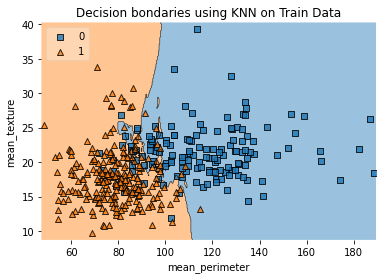

In [100]:
plot_decision_regions(X_train.values, Y_train.values, clf= clf, legend=2)
plt.title('Decision bondaries using KNN on Train Data')
plt.xlabel('mean_perimeter')
plt.ylabel('mean_texture');

C:\Users\omar\miniconda3\envs\tensorenv\lib\site-packages\mlxtend\plotting\decision_regions.py:249: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


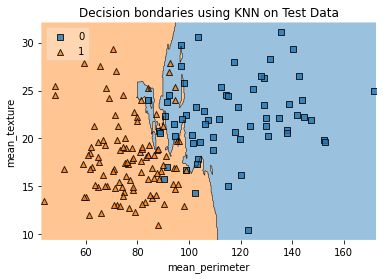

In [101]:
plot_decision_regions(X_test.values, Y_test.values, clf= clf, legend=2)
plt.title('Decision bondaries using KNN on Test Data')
plt.xlabel('mean_perimeter')
plt.ylabel('mean_texture');